In [3]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# 创建一个图形和轴
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.25)  # 调整布局以容纳滑动条

# 生成 x 值
x = np.linspace(0, 2 * np.pi, 1000)

# 初始参数
amplitude_init = 1.0
frequency_init = 1.0
phase_init = 0.0

# 初始化一个空的正弦曲线
line, = ax.plot(x, amplitude_init * np.sin(frequency_init * x + phase_init))

# 设置图形的标题和标签
ax.set_title('Interactive Sine Wave')
ax.set_xlabel('x')
ax.set_ylabel('sin(ax + b)')

# 添加滑动条
axcolor = 'lightgoldenrodyellow'
ax_amplitude = plt.axes([0.1, 0.1, 0.65, 0.03], facecolor=axcolor)
ax_frequency = plt.axes([0.1, 0.05, 0.65, 0.03], facecolor=axcolor)
ax_phase = plt.axes([0.1, 0.2, 0.65, 0.03], facecolor=axcolor)

s_amplitude = Slider(ax_amplitude, 'Amplitude', 0.1, 2.0, valinit=amplitude_init)
s_frequency = Slider(ax_frequency, 'Frequency', 0.1, 2.0, valinit=frequency_init)
s_phase = Slider(ax_phase, 'Phase', 0.0, 2*np.pi, valinit=phase_init)

# 更新函数，用于更新曲线的数据
def update(val):
    amplitude = s_amplitude.val
    frequency = s_frequency.val
    phase = s_phase.val
    line.set_ydata(amplitude * np.sin(frequency * x + phase))
    fig.canvas.draw_idle()

# 绑定更新函数到滑动条的事件
s_amplitude.on_changed(update)
s_frequency.on_changed(update)
s_phase.on_changed(update)

# 显示图形
plt.show()

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, CheckButtons

def generate_polygon(sides, radius):
    # 计算多边形的顶点坐标
    angles = np.linspace(0, 2 * np.pi, sides, endpoint=False)
    x = radius * np.cos(angles)
    y = radius * np.sin(angles)
    polygon = np.column_stack((x, y))
    return polygon

def update(val):
    # 更新复选框状态时的回调函数
    sides = int(slider.val)
    polygon = generate_polygon(sides, radius)
    line.set_xdata(polygon[:, 0])
    line.set_ydata(polygon[:, 1])
    fig.canvas.draw_idle()

# 初始参数
initial_sides = 6
radius = 1.0

# 生成初始多边形
polygon = generate_polygon(initial_sides, radius)

# 创建图形和轴
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.2, right=0.8)

# 绘制多边形
line, = ax.plot(polygon[:, 0], polygon[:, 1], 'b-')
ax.scatter(polygon[:, 0], polygon[:, 1], color='red')
ax.set_aspect('equal', adjustable='box')
ax.set_title('Regular Polygon')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.grid(True)

# 创建滑动条
ax_slider = plt.axes([0.85, 0.1, 0.1, 0.03], facecolor='lightgoldenrodyellow')
slider = Slider(ax_slider, 'Sides', 3, 20, valinit=initial_sides, valstep=1)
slider.on_changed(update)

# 显示图形
plt.show()


<IPython.core.display.Javascript object>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, CheckButtons

def generate_polygon(sides, radius):
    # 计算多边形的顶点坐标
    angles = np.linspace(0, 2 * np.pi, sides, endpoint=False)
    x = radius * np.cos(angles)
    y = radius * np.sin(angles)
    polygon = np.column_stack((x, y))
    polygon = np.vstack((polygon, polygon[0]))  # 添加起始点，使多边形闭合
    return polygon

def update(val):
    # 更新复选框状态时的回调函数
    sides = int(slider.val)
    polygon = generate_polygon(sides, radius)
    line.set_xdata(polygon[:, 0])
    line.set_ydata(polygon[:, 1])
    fig.canvas.draw_idle()

# 初始参数
initial_sides = 6
radius = 1.0

# 生成初始多边形
polygon = generate_polygon(initial_sides, radius)

# 创建图形和轴
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.2, right=0.8)

# 绘制多边形
line, = ax.plot(polygon[:, 0], polygon[:, 1], 'b-')
ax.scatter(polygon[:, 0], polygon[:, 1], color='red')
ax.set_aspect('equal', adjustable='box')
ax.set_title('Regular Polygon')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.grid(True)

# 创建滑动条
ax_slider = plt.axes([0.85, 0.1, 0.1, 0.03], facecolor='lightgoldenrodyellow')
slider = Slider(ax_slider, 'Sides', 3, 20, valinit=initial_sides, valstep=1)
slider.on_changed(update)

# 显示图形
plt.show()


<IPython.core.display.Javascript object>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

def generate_polygon(sides, radius):
    # 计算多边形的顶点坐标
    angles = np.linspace(0, 2 * np.pi, sides, endpoint=False)
    x = radius * np.cos(angles)
    y = radius * np.sin(angles)
    polygon = np.column_stack((x, y))
    polygon = np.vstack((polygon, polygon[0]))  # 添加起始点，使多边形闭合
    return polygon

def update(val):
    # 更新按钮状态时的回调函数
    sides = int(sides_text.get_text())
    polygon = generate_polygon(sides, radius)
    line.set_xdata(polygon[:, 0])
    line.set_ydata(polygon[:, 1])
    fig.canvas.draw_idle()

def increase_sides(event):
    current_sides = int(sides_text.get_text())
    new_sides = min(20, current_sides + 1)
    sides_text.set_text(str(new_sides))
    update(None)

def decrease_sides(event):
    current_sides = int(sides_text.get_text())
    new_sides = max(3, current_sides - 1)
    sides_text.set_text(str(new_sides))
    update(None)

# 初始参数
initial_sides = 6
radius = 1.0

# 生成初始多边形
polygon = generate_polygon(initial_sides, radius)

# 创建图形和轴
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.2, right=0.8)

# 绘制多边形
line, = ax.plot(polygon[:, 0], polygon[:, 1], 'b-')
ax.scatter(polygon[:, 0], polygon[:, 1], color='red')
ax.set_aspect('equal', adjustable='box')
ax.set_title('Regular Polygon')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.grid(True)

# 创建增大和减小按钮
ax_increase = plt.axes([0.85, 0.4, 0.1, 0.05])
ax_decrease = plt.axes([0.85, 0.3, 0.1, 0.05])
button_increase = Button(ax_increase, '+')
button_decrease = Button(ax_decrease, '-')
button_increase.on_clicked(increase_sides)
button_decrease.on_clicked(decrease_sides)

# 显示多边形边数的文本
sides_text = plt.text(0.85, 0.2, str(initial_sides), transform=ax.transAxes, fontsize=12, ha='center')

# 显示图形
plt.show()


<IPython.core.display.Javascript object>

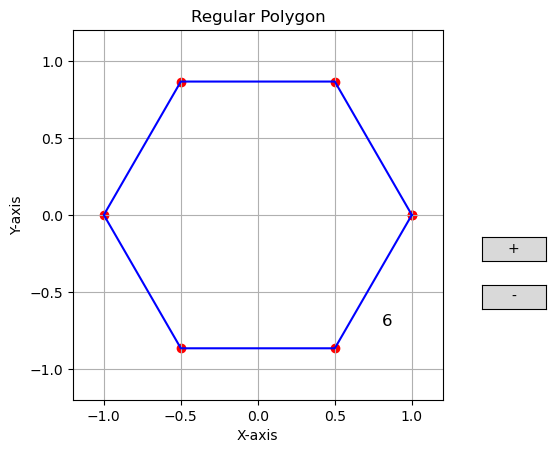

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

def generate_polygon(sides, radius):
    # 计算多边形的顶点坐标
    angles = np.linspace(0, 2 * np.pi, sides, endpoint=False)
    x = radius * np.cos(angles)
    y = radius * np.sin(angles)
    polygon = np.column_stack((x, y))
    polygon = np.vstack((polygon, polygon[0]))  # 添加起始点，使多边形闭合
    return polygon

def update(val):
    # 更新按钮状态时的回调函数
    sides = int(sides_text.get_text())
    polygon = generate_polygon(sides, radius)
    line.set_xdata(polygon[:, 0])
    line.set_ydata(polygon[:, 1])
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    fig.canvas.draw_idle()

def increase_sides(event):
    current_sides = int(sides_text.get_text())
    new_sides = min(20, current_sides + 1)
    sides_text.set_text(str(new_sides))
    update(None)

def decrease_sides(event):
    current_sides = int(sides_text.get_text())
    new_sides = max(3, current_sides - 1)
    sides_text.set_text(str(new_sides))
    update(None)

# 初始参数
initial_sides = 6
radius = 1.0

# 生成初始多边形
polygon = generate_polygon(initial_sides, radius)

# 创建图形和轴
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.2, right=0.8)

# 绘制多边形
line, = ax.plot(polygon[:, 0], polygon[:, 1], 'b-')
ax.scatter(polygon[:, 0], polygon[:, 1], color='red')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal', adjustable='box')
ax.set_title('Regular Polygon')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.grid(True)

# 创建增大和减小按钮
ax_increase = plt.axes([0.85, 0.4, 0.1, 0.05])
ax_decrease = plt.axes([0.85, 0.3, 0.1, 0.05])
button_increase = Button(ax_increase, '+')
button_decrease = Button(ax_decrease, '-')
button_increase.on_clicked(increase_sides)
button_decrease.on_clicked(decrease_sides)

# 显示多边形边数的文本
sides_text = plt.text(0.85, 0.2, str(initial_sides), transform=ax.transAxes, fontsize=12, ha='center')

# 显示图形
plt.show()


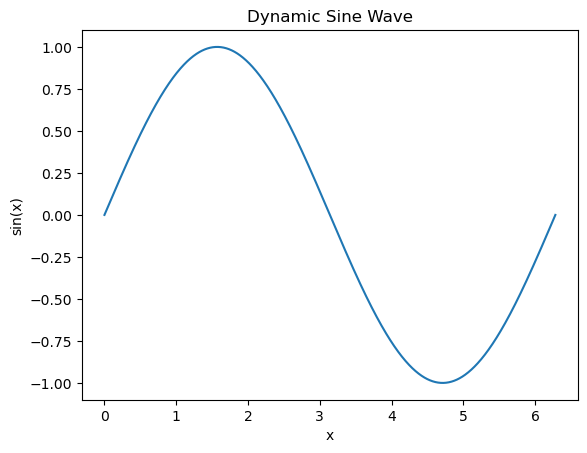

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image

# 创建一个图形和轴
fig, ax = plt.subplots()

# 生成 x 值
x = np.linspace(0, 2 * np.pi, 1000)

# 初始化一个空的正弦曲线
line, = ax.plot(x, np.sin(x))

# 设置图形的标题和标签
ax.set_title('Dynamic Sine Wave')
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')

# 定义更新函数，用于更新曲线的数据
def update(frame):
    # 在每一帧中更新曲线的数据
    line.set_ydata(np.sin(x + frame * 0.1))  # 在sin函数中引入时间变量来模拟波动
    return line,

# 创建动画对象
animation = FuncAnimation(fig, update, frames=range(100), interval=50)

# 保存动画为 GIF 图片
# animation.save('sine_wave_animation.gif', writer='imagemagick', fps=30)

# 显示动画（可选）
plt.show()
